## Shot noise

##### from Wikipedia

For large numbers, the Poisson distribution approaches a normal distribution about its mean, and the elementary events (photons, electrons, etc.) are no longer individually observed, typically making shot noise in actual observations indistinguishable from true Gaussian noise. Since the standard deviation of shot noise is equal to the square root of the average number of events N, the signal-to-noise ratio (SNR) is given by:

$SNR=\sqrt{N}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lib.helpersmd import getRandomND
from lib.signalprocessingmd import harm
from lib.plotmd import plotVector,plot2D
%matplotlib notebook

- Create harmonic signal

$x(t)=A\sin(2\pi ft)$

- Generate random noise signal

noise : random signal

- Add the two signals to form noisy harmonic signal

$y(t)=x(t)+noise$

<IPython.core.display.Javascript object>


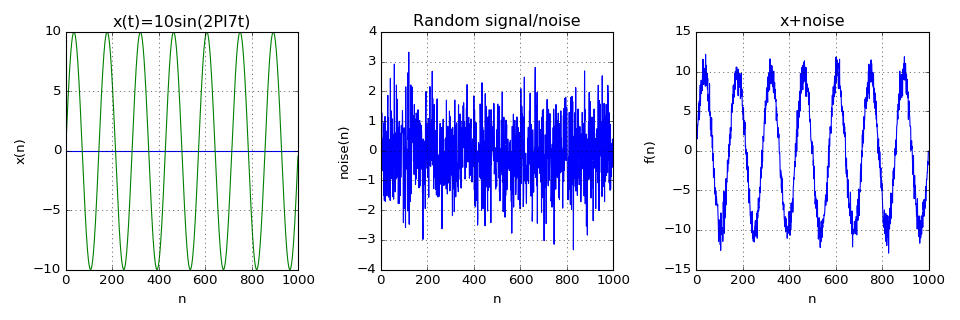

In [2]:
N=1000
dt=0.001
# 100sin(2PI53t)
A=10
f=7

xk,desc1=harm(A,f,dt,N)
noise=getRandomND(N)
yk=xk+noise

plt.figure(1,figsize=(12, 4), dpi=80)
plt.subplot(131)
plt.plot([0,1000],[0,0])
plotVector(xk,"x(t)="+desc1,"n","x(n)")
plt.subplot(132)
plotVector(noise,"Random signal/noise","n","noise(n)")
plt.subplot(133)
plotVector(yk,"x+noise","n","f(n)")
plt.tight_layout()
plt.show()

If the number of channels is N , plot signal at different values of N .

<IPython.core.display.Javascript object>


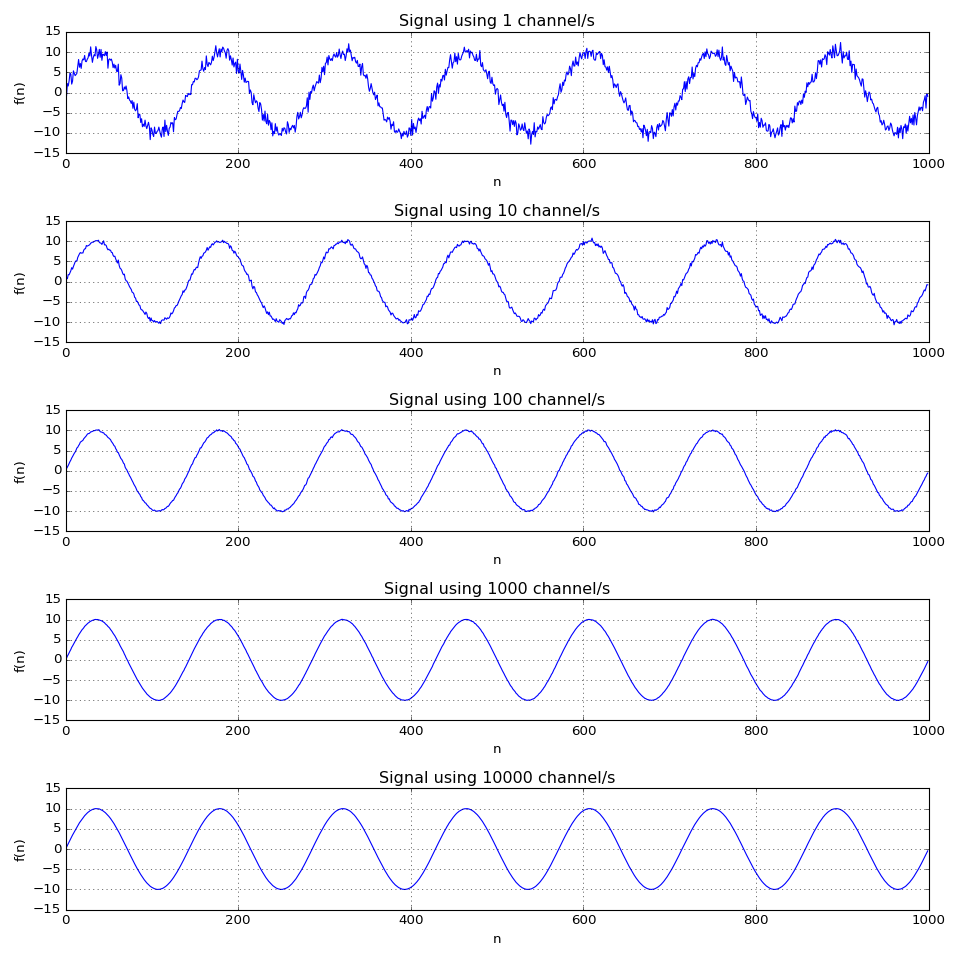

std 1 = 1.00606561965
std 10 = 0.308255299898
std 100 = 0.0993996795537
std 1000 = 0.0310165105944
std 10000 = 0.0100734448673


In [3]:
sm=np.zeros((N,1))
smNoise=np.zeros((N,1))
stds=[]
plt.figure(2,figsize=(12, 12), dpi=80)
kfig=510
for i in range(0,10000):
  xk,desc1=harm(A,f,dt,N)
  noise=getRandomND(N)
  
  xk_noise=xk+noise
  sm+=xk_noise
  smNoise+=noise
  std=(smNoise/(i+1)).std()
  stds.append(std)
  if i in [0,9,99,999,9999]:
        kfig=kfig+1
        plt.subplot(kfig)
        curr=sm/(i+1)
        plotVector(curr,"Signal using {} channel/s".format(i+1),"n","f(n)")
        print "std {} = {}".format(i+1,std)
plt.tight_layout()
plt.show()

### Notice and compare

Since the standard deviation of shot noise is equal to the square root of the average number of events N, the signal-to-noise ratio (SNR) is given by:

$SNR=\sqrt{N}$

<IPython.core.display.Javascript object>


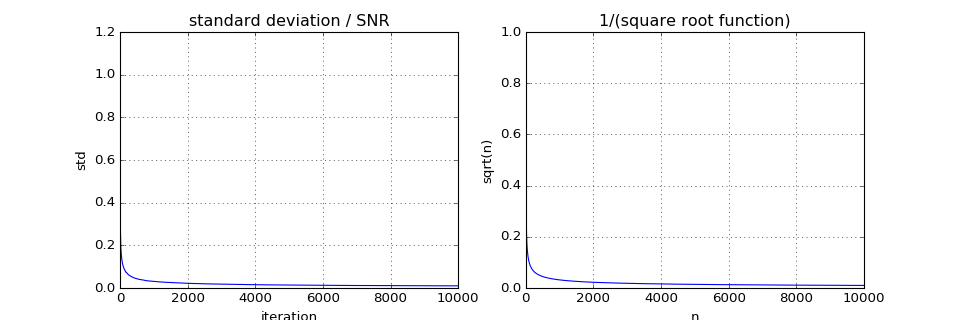

In [4]:
sq=1/np.sqrt(np.arange(1,10000))
plt.figure(3,figsize=(12, 4), dpi=80)
plt.subplot(121)
plotVector(stds,"standard deviation / SNR","iteration","std")
plt.subplot(122)
plotVector(sq,"1/(square root function)","n","sqrt(n)")
plt.show()

$S(k,w)=\sum_{i=0}^{w-1}X_{k+i}$

plot 

<IPython.core.display.Javascript object>


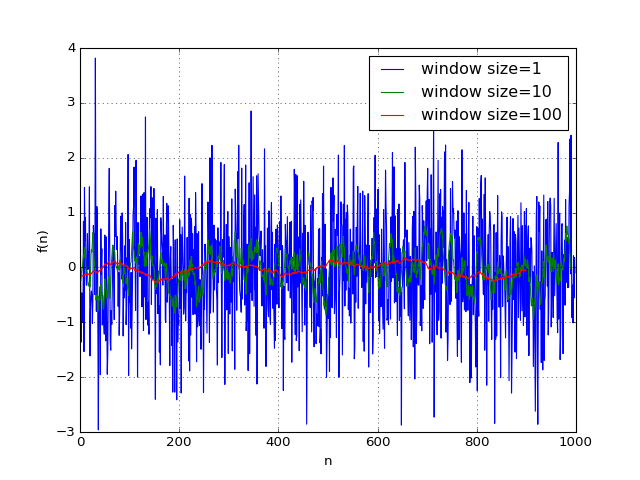

In [5]:
def singleStep(X,w,k):
    return X[k:k+w].mean()
def antiRandom(X,w):
    N=X.shape[0]
    return np.array([singleStep(X,w,k) for k in range(N-w)])
plt.figure(4)
for i in [1,10,100]:
  ans=antiRandom(noise,i)
  plotVector(ans," ","n","f(n)")
plt.legend(["window size=1","window size=10","window size=100"])
plt.show()